Objetivo
Realizar una limpieza de datos para preparar el dataset para su análisis.

---

Tareas
Carga y exploración
Carga el archivo CSV.
Usa .head(), .info() y .describe() para revisar el contenido.

Estilo de columnas
Estandariza los nombres: minúsculas y snake_case.

Limpieza de campos
Homogeneiza red_social, mes_inicio, cliente y responsable.
Asegúrate que todos los valores en segmento_objetivo pertenezcan a una lista válida.

Manejo de nulos
Identifica y reporta columnas con valores nulos.

Duplicados
Identifica y elimina duplicados explícitos.

Análisis preliminar (groupby)
Total de campañas por cliente, red_social y segmento_objetivo.
Promedio de presupuesto por cliente.
Total de conversiones por segmento.
Top 3 responsables con más campañas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("redes_clean.csv")

df.head()


,campaña_id,cliente,red_social,mes_inicio,año_campaña,presupuesto_usd,clics,conversiones,responsable,segmento_objetivo
0,1,FastFit,instagram,octubre,2024,1139.36,285,187,NaN,adultos mayores
1,2,EcoVida,twitter,diciembre,2024,1314.81,344,89,Jorge Ruiz,adultos mayores
2,3,FastFit,tiktok,septiembre,2024,2925.79,936,61,No asignado,adultos mayores
3,4,TecnoMundo,facebook,mayo,2023,2478.86,379,125,No asignado,adultos mayores
4,5,FastFit,facebook,julio,2023,1672.20,482,70,NaN,jóvenes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaña_id         100 non-null    int64  
 1   cliente            96 non-null     object 
 2   red_social         100 non-null    object 
 3   mes_inicio         100 non-null    object 
 4   año_campaña        100 non-null    int64  
 5   presupuesto_usd    100 non-null    float64
 6   clics              100 non-null    int64  
 7   conversiones       100 non-null    int64  
 8   responsable        90 non-null     object 
 9   segmento_objetivo  99 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


In [4]:
df.describe()

,campaña_id,año_campaña,presupuesto_usd,clics,conversiones
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2023.500000,1865.216100,577.920000,104.570000
std,29.011492,0.502519,645.063425,232.195524,53.684498
min,1.000000,2023.000000,811.430000,109.000000,15.000000
25%,25.750000,2023.000000,1315.072500,406.750000,63.500000
50%,50.500000,2023.500000,1859.775000,578.000000,102.500000
75%,75.250000,2024.000000,2495.937500,792.250000,149.500000
max,100.000000,2024.000000,2931.630000,996.000000,195.000000


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

df


,campaña_id,cliente,red_social,mes_inicio,año_campaña,presupuesto_usd,clics,conversiones,responsable,segmento_objetivo
0,1,FastFit,instagram,octubre,2024,1139.36,285,187,NaN,adultos mayores
1,2,EcoVida,twitter,diciembre,2024,1314.81,344,89,Jorge Ruiz,adultos mayores
2,3,FastFit,tiktok,septiembre,2024,2925.79,936,61,No asignado,adultos mayores
3,4,TecnoMundo,facebook,mayo,2023,2478.86,379,125,No asignado,adultos mayores
4,5,FastFit,facebook,julio,2023,1672.20,482,70,NaN,jóvenes
...,...,...,...,...,...,...,...,...,...,...
95,96,TecnoMundo,twitter,junio,2024,2158.20,933,182,María Torres,padres de familia
96,97,TecnoMundo,instagram,junio,2023,1923.81,528,162,Luis Gómez,padres de familia
97,98,Salud Total,instagram,agosto,2024,1108.65,422,125,No asignado,jóvenes
98,99,EcoVida,TIKTOK,julio,2024,1714.39,960,123,NaN,adultos mayores


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaña_id         100 non-null    int64  
 1   cliente            96 non-null     object 
 2   red_social         100 non-null    object 
 3   mes_inicio         100 non-null    object 
 4   año_campaña        100 non-null    int64  
 5   presupuesto_usd    100 non-null    float64
 6   clics              100 non-null    int64  
 7   conversiones       100 non-null    int64  
 8   responsable        90 non-null     object 
 9   segmento_objetivo  99 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


In [7]:
segmentos = ["jovenes", "adultos", "mayores", "estudiantes", "profesionales"]


In [8]:
df["segmento_objetivo"] = df["segmento_objetivo"].astype(str).str.strip().str.lower()

df

,campaña_id,cliente,red_social,mes_inicio,año_campaña,presupuesto_usd,clics,conversiones,responsable,segmento_objetivo
0,1,FastFit,instagram,octubre,2024,1139.36,285,187,NaN,adultos mayores
1,2,EcoVida,twitter,diciembre,2024,1314.81,344,89,Jorge Ruiz,adultos mayores
2,3,FastFit,tiktok,septiembre,2024,2925.79,936,61,No asignado,adultos mayores
3,4,TecnoMundo,facebook,mayo,2023,2478.86,379,125,No asignado,adultos mayores
4,5,FastFit,facebook,julio,2023,1672.20,482,70,NaN,jóvenes
...,...,...,...,...,...,...,...,...,...,...
95,96,TecnoMundo,twitter,junio,2024,2158.20,933,182,María Torres,padres de familia
96,97,TecnoMundo,instagram,junio,2023,1923.81,528,162,Luis Gómez,padres de familia
97,98,Salud Total,instagram,agosto,2024,1108.65,422,125,No asignado,jóvenes
98,99,EcoVida,TIKTOK,julio,2024,1714.39,960,123,NaN,adultos mayores


In [9]:
invalidos = ~df["segmento_objetivo"].isin(segmentos)

print(df[invalidos])

df

    campaña_id      cliente red_social  mes_inicio  año_campaña  \
0            1      FastFit  instagram     octubre         2024   
1            2      EcoVida    twitter   diciembre         2024   
2            3      FastFit     tiktok  septiembre         2024   
3            4   TecnoMundo   facebook        mayo         2023   
4            5      FastFit   facebook       julio         2023   
..         ...          ...        ...         ...          ...   
95          96   TecnoMundo    twitter       junio         2024   
96          97   TecnoMundo  instagram       junio         2023   
97          98  Salud Total  instagram      agosto         2024   
98          99      EcoVida     TIKTOK       julio         2024   
99         100      FastFit  instagram  septiembre         2024   

    presupuesto_usd  clics  conversiones   responsable  segmento_objetivo  
0           1139.36    285           187           NaN    adultos mayores  
1           1314.81    344            89   

,campaña_id,cliente,red_social,mes_inicio,año_campaña,presupuesto_usd,clics,conversiones,responsable,segmento_objetivo
0,1,FastFit,instagram,octubre,2024,1139.36,285,187,NaN,adultos mayores
1,2,EcoVida,twitter,diciembre,2024,1314.81,344,89,Jorge Ruiz,adultos mayores
2,3,FastFit,tiktok,septiembre,2024,2925.79,936,61,No asignado,adultos mayores
3,4,TecnoMundo,facebook,mayo,2023,2478.86,379,125,No asignado,adultos mayores
4,5,FastFit,facebook,julio,2023,1672.20,482,70,NaN,jóvenes
...,...,...,...,...,...,...,...,...,...,...
95,96,TecnoMundo,twitter,junio,2024,2158.20,933,182,María Torres,padres de familia
96,97,TecnoMundo,instagram,junio,2023,1923.81,528,162,Luis Gómez,padres de familia
97,98,Salud Total,instagram,agosto,2024,1108.65,422,125,No asignado,jóvenes
98,99,EcoVida,TIKTOK,julio,2024,1714.39,960,123,NaN,adultos mayores


In [10]:

duplicados = df.duplicated()

duplicados.sum()
#No hay duplicados 



np.int64(0)

In [11]:
df

,campaña_id,cliente,red_social,mes_inicio,año_campaña,presupuesto_usd,clics,conversiones,responsable,segmento_objetivo
0,1,FastFit,instagram,octubre,2024,1139.36,285,187,NaN,adultos mayores
1,2,EcoVida,twitter,diciembre,2024,1314.81,344,89,Jorge Ruiz,adultos mayores
2,3,FastFit,tiktok,septiembre,2024,2925.79,936,61,No asignado,adultos mayores
3,4,TecnoMundo,facebook,mayo,2023,2478.86,379,125,No asignado,adultos mayores
4,5,FastFit,facebook,julio,2023,1672.20,482,70,NaN,jóvenes
...,...,...,...,...,...,...,...,...,...,...
95,96,TecnoMundo,twitter,junio,2024,2158.20,933,182,María Torres,padres de familia
96,97,TecnoMundo,instagram,junio,2023,1923.81,528,162,Luis Gómez,padres de familia
97,98,Salud Total,instagram,agosto,2024,1108.65,422,125,No asignado,jóvenes
98,99,EcoVida,TIKTOK,julio,2024,1714.39,960,123,NaN,adultos mayores


Puntos de investigación 


-Número de campañas por red social, cliente o responsable

-Conversión por red social (conversiones / clics)

-Presupuesto total por cliente o red social

-Campañas activas por mes o año

-Comparar rendimiento entre redes sociales

-Campañas sin responsable asignado (filtrar por "NaN" o "No asignado")

In [12]:
#Numero de campañas por cada red social 
campañas_red = df ["red_social"]. value_counts().reset_index()

campañas_red

,red_social,count
0,twitter,27
1,instagram,26
2,tiktok,24
3,facebook,17
4,INSTAGRAM,2
5,FACEBOOK,2
6,TIKTOK,2


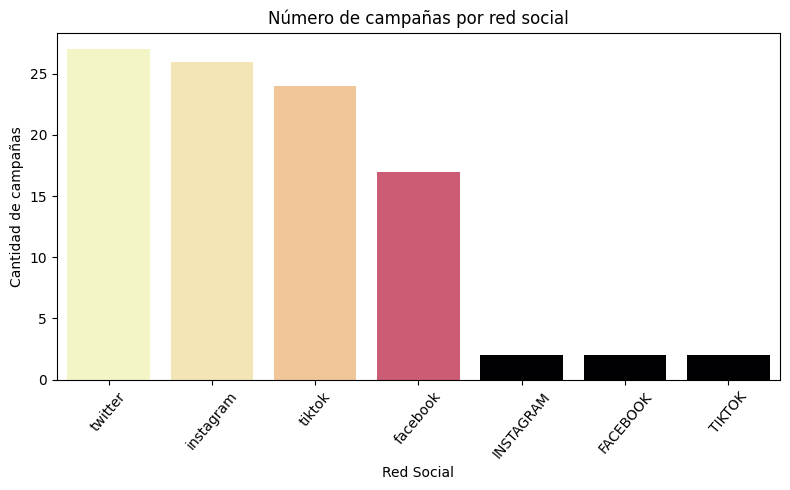

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=campañas_red, x="red_social", y="count", 
            hue="count", palette="magma", legend=False)
plt.title("Número de campañas por red social")
plt.xlabel("Red Social")
plt.ylabel("Cantidad de campañas")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



In [14]:
#Campañas por clientes
campañas_cliente = df["cliente"].value_counts().reset_index()
campañas_cliente.columns = ["cliente", "número_campañas"]

campañas_cliente


,cliente,número_campañas
0,FastFit,21
1,EcoVida,21
2,Salud Total,19
3,TecnoMundo,18
4,EstiloPro,17


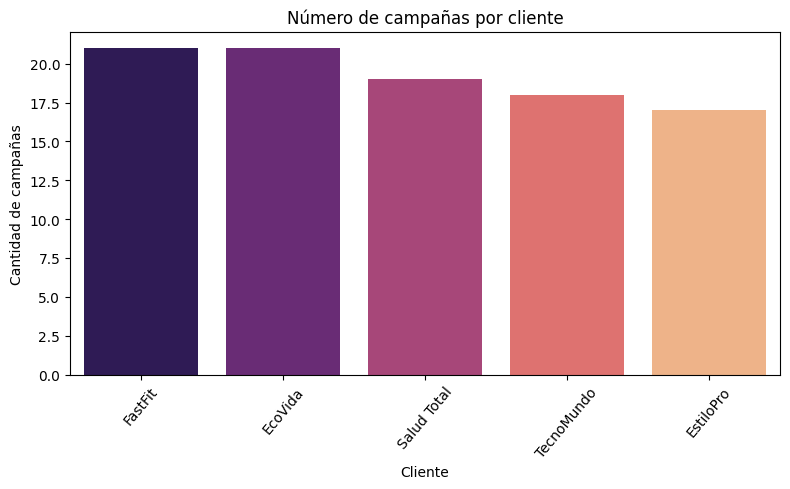

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=campañas_cliente, x="cliente", y="número_campañas", 
            hue="cliente", palette="magma", legend=False)
plt.title("Número de campañas por cliente")
plt.xlabel("Cliente")
plt.ylabel("Cantidad de campañas")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


In [16]:
#Campañas por responsable 
campañas_responsable = df["responsable"].fillna("no asignado").str.lower().str.strip().value_counts().reset_index()
campañas_responsable.columns = ["responsable", "número_campañas"]

campañas_responsable

,responsable,número_campañas
0,maría torres,32
1,no asignado,21
2,luis gómez,19
3,jorge ruiz,14
4,ana martínez,14


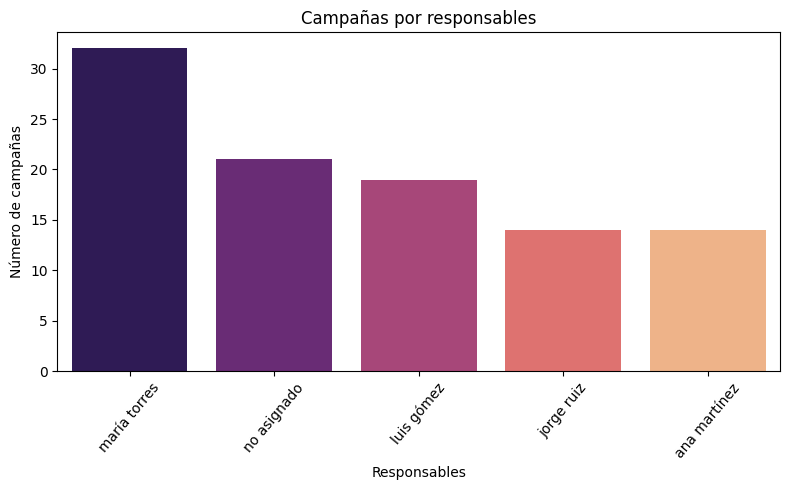

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=campañas_responsable, x= "responsable", y= "número_campañas", 
            hue= "responsable", palette = "magma", legend=False)
plt.title("Campañas por responsables")
plt.xlabel ("Responsables")
plt.ylabel("Número de campañas")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [19]:
#Tasa de conversio por campaña 
df["tasa_conversion"] = (df["conversiones"] / df["clics"]) * 100
df

,campaña_id,cliente,red_social,mes_inicio,año_campaña,presupuesto_usd,clics,conversiones,responsable,segmento_objetivo,tasa_conversion
0,1,FastFit,instagram,octubre,2024,1139.36,285,187,NaN,adultos mayores,65.614035
1,2,EcoVida,twitter,diciembre,2024,1314.81,344,89,Jorge Ruiz,adultos mayores,25.872093
2,3,FastFit,tiktok,septiembre,2024,2925.79,936,61,No asignado,adultos mayores,6.517094
3,4,TecnoMundo,facebook,mayo,2023,2478.86,379,125,No asignado,adultos mayores,32.981530
4,5,FastFit,facebook,julio,2023,1672.20,482,70,NaN,jóvenes,14.522822
...,...,...,...,...,...,...,...,...,...,...,...
95,96,TecnoMundo,twitter,junio,2024,2158.20,933,182,María Torres,padres de familia,19.506967
96,97,TecnoMundo,instagram,junio,2023,1923.81,528,162,Luis Gómez,padres de familia,30.681818
97,98,Salud Total,instagram,agosto,2024,1108.65,422,125,No asignado,jóvenes,29.620853
98,99,EcoVida,TIKTOK,julio,2024,1714.39,960,123,NaN,adultos mayores,12.812500


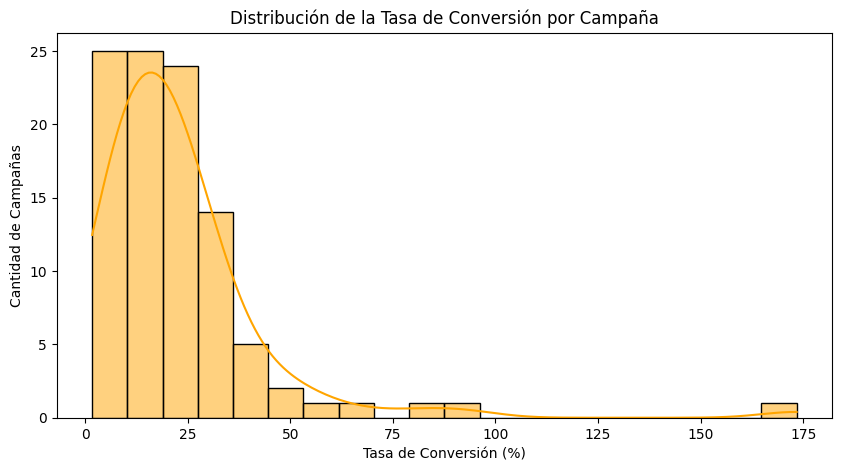

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df["tasa_conversion"], bins=20, kde=True, color="orange")
plt.title("Distribución de la Tasa de Conversión por Campaña")
plt.xlabel("Tasa de Conversión (%)")
plt.ylabel("Cantidad de Campañas")
plt.show()

In [21]:
#Conversión por red social 
tasa_red = df.groupby("red_social")["tasa_conversion"].mean().reset_index()
tasa_red


,red_social,tasa_conversion
0,FACEBOOK,28.315864
1,INSTAGRAM,16.854961
2,TIKTOK,18.129852
3,facebook,21.464681
4,instagram,27.373739
5,tiktok,24.919034
6,twitter,17.015618


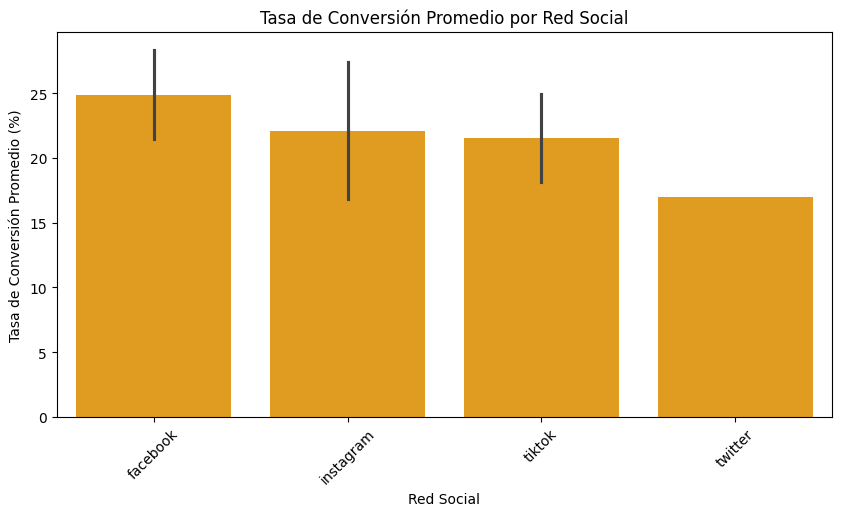

In [22]:
tasa_red["red_social"] = tasa_red["red_social"].str.lower()

plt.figure(figsize=(10, 5))
sns.barplot(data=tasa_red, x="red_social", y="tasa_conversion", color="orange")
plt.title("Tasa de Conversión Promedio por Red Social")
plt.xlabel("Red Social")
plt.ylabel("Tasa de Conversión Promedio (%)")
plt.xticks(rotation=45)
plt.show()

In [23]:
#Presupuesto 
presupuesto_red = df.groupby("red_social")["presupuesto_usd"].sum().reset_index()
presupuesto_red

,red_social,presupuesto_usd
0,FACEBOOK,3696.18
1,INSTAGRAM,3811.06
2,TIKTOK,2549.00
3,facebook,30608.06
4,instagram,46891.70
5,tiktok,46374.85
6,twitter,52590.76


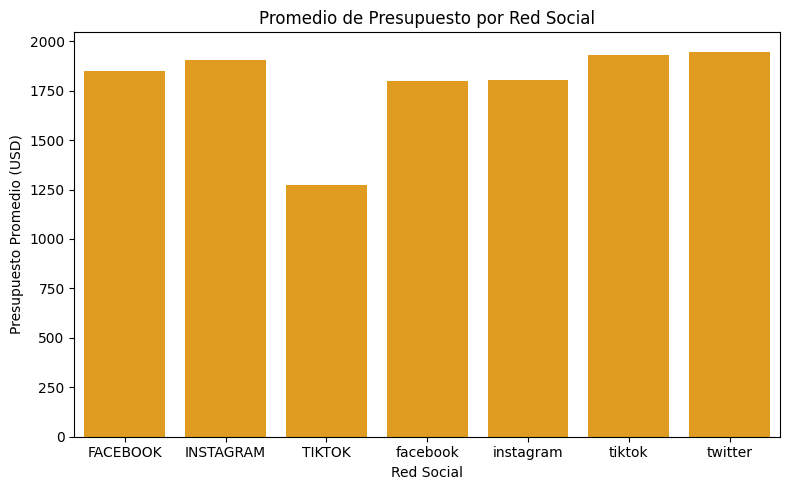

In [24]:
presupuesto_red = df.groupby("red_social")["presupuesto_usd"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=presupuesto_red, x="red_social", y="presupuesto_usd", color="orange")

plt.title("Promedio de Presupuesto por Red Social")
plt.xlabel("Red Social")
plt.ylabel("Presupuesto Promedio (USD)")
plt.tight_layout()
plt.show()

In [25]:
#Rendimientos 
rendimiento_red = df.groupby("red_social")[["conversiones", "presupuesto_usd"]].sum().reset_index()
rendimiento_red

,red_social,conversiones,presupuesto_usd
0,FACEBOOK,337,3696.18
1,INSTAGRAM,195,3811.06
2,TIKTOK,274,2549.00
3,facebook,1555,30608.06
4,instagram,3105,46891.70
5,tiktok,2638,46374.85
6,twitter,2353,52590.76


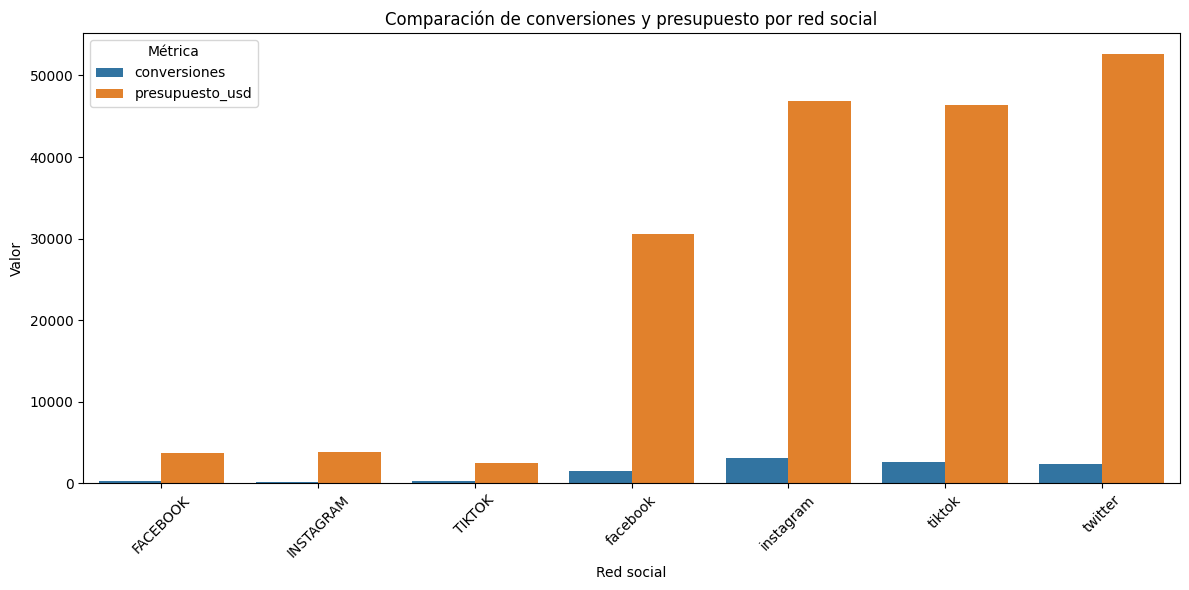

In [27]:
df = pd.DataFrame(rendimiento_red)

plt.figure(figsize=(12,6))

sns.barplot(data=df.melt(id_vars="red_social", value_vars=["conversiones", "presupuesto_usd"]),
            x="red_social", y="value", hue="variable")

plt.title("Comparación de conversiones y presupuesto por red social")
plt.ylabel("Valor")
plt.xlabel("Red social")
plt.xticks(rotation=45)
plt.legend(title="Métrica")

plt.tight_layout()
plt.show()